# BYTETrack



In [20]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-

## Install Dependencies

In [2]:
!nvidia-smi

Tue Apr 30 05:36:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install YOLOv8 and BYTETrack

In [3]:
!git clone https://github.com/ifzhang/ByteTrack.git
%cd ByteTrack

Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
Updating files: 100% (229/229), done.
/content/ByteTrack


In [4]:
!pip3 install -r requirements.txt
!python3 setup.py develop
!pip3 install cython
!pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip3 install cython_bbox

!pip install ultralytics --quiet

## OR

# git clone https://github.com/ultralytics/ultralytics
# cd ultralytics
# pip install -e ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/67

### Import Packages

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import random
from PIL import Image as PILImage
import cv2
import numpy as np
import yaml
import torch
import time
from collections import deque

## Dataset Preparation

In [6]:
HOME = "/content/ByteTrack"

In [10]:
%cd "/{HOME}/datasets"
!unzip sensor4.zip

/content/ByteTrack/datasets
Archive:  sensor4.zip
   creating: sensor4/
  inflating: sensor4/sensor4.yaml    
   creating: sensor4/training/
  inflating: sensor4/training/right_half - frame at 0m39s.jpg  
  inflating: sensor4/training/right_half - frame at 0m39s.txt  
  inflating: sensor4/training/right_half - frame at 0m48s.jpg  
  inflating: sensor4/training/right_half - frame at 0m48s.txt  
  inflating: sensor4/training/right_half - frame at 12m40s.jpg  
  inflating: sensor4/training/right_half - frame at 12m40s.txt  
  inflating: sensor4/training/right_half - frame at 13m44s.jpg  
  inflating: sensor4/training/right_half - frame at 13m44s.txt  
  inflating: sensor4/training/right_half - frame at 15m54s.jpg  
  inflating: sensor4/training/right_half - frame at 15m54s.txt  
  inflating: sensor4/training/right_half - frame at 16m15s.jpg  
  inflating: sensor4/training/right_half - frame at 16m15s.txt  
  inflating: sensor4/training/right_half - frame at 16m8s.jpg  
  inflating: sensor

## Train YOLOv8 Detector

In [11]:
TEST_SIZE = 640
BATCH_SIZE = 4
EPOCHS = 50

In [13]:
%cd {HOME}

# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=f"{HOME}/datasets/sensor4.yaml", imgsz=TEST_SIZE, batch=BATCH_SIZE, epochs=EPOCHS, plots=True)

/content/ByteTrack
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ByteTrack/datasets/sensor4.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.7MB/s]


AMP: checks passed ✅


train: Scanning /content/ByteTrack/datasets/training... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 750.24it/s]

train: New cache created: /content/ByteTrack/datasets/training.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/ByteTrack/datasets/validation... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 2022.98it/s]

val: New cache created: /content/ByteTrack/datasets/validation.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.55G      1.762      1.643      1.205         19        640: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all         30        145      0.504      0.138      0.176     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.36G      1.804      1.918      1.296          7        640: 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all         30        145      0.424       0.69      0.435       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G      1.806      1.371      1.251         20        640: 100%|██████████| 18/18 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         30        145      0.741      0.613      0.671      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.38G      1.784      1.752      1.292         20        640: 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]

                   all         30        145      0.732      0.583      0.643      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.38G      1.932      1.522      1.435         11        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all         30        145     0.0673      0.262     0.0367     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G      2.289      1.494      1.583          4        640: 100%|██████████| 18/18 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]

                   all         30        145      0.622      0.465      0.493      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G      1.938      1.775      1.381         12        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]

                   all         30        145      0.246      0.412      0.177     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.38G      1.883      1.779      1.388         16        640: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all         30        145       0.02      0.434     0.0157    0.00565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G      1.844      1.315      1.423         17        640: 100%|██████████| 18/18 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all         30        145    0.00329      0.186    0.00185   0.000865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.37G      1.802      1.153       1.38         11        640: 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all         30        145    0.00329      0.186    0.00185   0.000865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G      1.957      1.325      1.562          5        640: 100%|██████████| 18/18 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]

                   all         30        145    0.00329      0.186    0.00185   0.000865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G      1.962      1.596      1.644          9        640: 100%|██████████| 18/18 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         30        145    0.00329      0.186    0.00185   0.000865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G      1.894      1.374      1.417          8        640: 100%|██████████| 18/18 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all         30        145    0.00111      0.069   0.000688   0.000161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.38G      1.793      1.195      1.338         22        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all         30        145    0.00111      0.069   0.000688   0.000161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.39G       1.79       1.34      1.389         23        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all         30        145    0.00111      0.069    0.00064   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.39G      1.729       1.15      1.377         10        640: 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all         30        145    0.00111      0.069    0.00064   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G      1.729        1.1      1.366         11        640: 100%|██████████| 18/18 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all         30        145    0.00111      0.069    0.00064   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.699      1.118      1.335         12        640: 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all         30        145    0.00111      0.069    0.00064   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G      1.748       1.07      1.335         17        640: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.10it/s]

                   all         30        145      0.317      0.419      0.182     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.4G      1.722      1.017      1.353         16        640: 100%|██████████| 18/18 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all         30        145      0.426     0.0897     0.0826     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G      1.624     0.9184      1.251         20        640: 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         30        145      0.307      0.103     0.0889     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G        1.7      1.001      1.356          8        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all         30        145       0.44      0.269      0.224     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.37G      1.681     0.9373      1.274         12        640: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all         30        145      0.771      0.557       0.65      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G      1.629     0.9029       1.31          4        640: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]

                   all         30        145      0.901      0.752      0.864        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G      1.639     0.9238      1.316         17        640: 100%|██████████| 18/18 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all         30        145       0.93      0.759      0.881      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G      1.674      1.004      1.403          5        640: 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         30        145      0.899      0.786      0.877      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G      1.723     0.9378      1.325          8        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all         30        145      0.877      0.787       0.87       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G      1.603     0.9021      1.258         19        640: 100%|██████████| 18/18 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all         30        145      0.919      0.778      0.879      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.38G      1.616     0.9243      1.303          9        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         30        145      0.845      0.793      0.882      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.38G      1.546     0.8232      1.249         18        640: 100%|██████████| 18/18 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all         30        145      0.849      0.766      0.882      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G      1.495      0.815      1.249          8        640: 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all         30        145      0.839      0.745       0.89      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G      1.541     0.8427      1.276         15        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         30        145      0.866      0.756      0.891       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.38G      1.554     0.8666      1.322         16        640: 100%|██████████| 18/18 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         30        145      0.875      0.745       0.88      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G      1.587     0.8464       1.29          4        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all         30        145      0.892      0.745      0.889      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G      1.569     0.8473      1.264          6        640: 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         30        145      0.858      0.814      0.888      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.39G      1.563     0.8307      1.211         10        640: 100%|██████████| 18/18 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all         30        145      0.865      0.786      0.892      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G      1.506     0.8227      1.196         10        640: 100%|██████████| 18/18 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all         30        145      0.864      0.766      0.878      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G      1.495     0.8055      1.211          8        640: 100%|██████████| 18/18 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all         30        145      0.872      0.755      0.867      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G      1.448     0.7814      1.212         12        640: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all         30        145      0.873      0.755      0.866      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G      1.443     0.7722      1.223         14        640: 100%|██████████| 18/18 [00:03<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all         30        145      0.873      0.757       0.88      0.445


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G      1.446     0.7483      1.211         10        640: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]


                   all         30        145      0.876      0.786      0.887       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G      1.407     0.7145      1.181         13        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all         30        145      0.843      0.813      0.891      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G      1.422     0.6922       1.18         10        640: 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30        145      0.856      0.821      0.902      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.39G      1.421      0.719      1.187         12        640: 100%|██████████| 18/18 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all         30        145      0.849      0.852      0.916      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.4G      1.449     0.6972      1.193          4        640: 100%|██████████| 18/18 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all         30        145      0.907      0.803      0.912      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G      1.373     0.6897      1.208          8        640: 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]

                   all         30        145      0.888      0.824      0.907       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.38G      1.358      0.711      1.146          9        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all         30        145      0.919        0.8      0.911      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.37G      1.317     0.6593      1.124         10        640: 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         30        145      0.935      0.795      0.917      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.37G      1.318     0.6457      1.141          5        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.73it/s]

                   all         30        145      0.935      0.789      0.913      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.38G      1.337     0.6642      1.142          9        640: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all         30        145      0.927      0.791      0.911      0.468



50 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]


                   all         30        145      0.935      0.795      0.917      0.471
Speed: 1.8ms preprocess, 15.3ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2


### Check Detector Output on Frame

In [19]:
%cd {HOME}

#training_run = "train" /content/ByteTrack/datasets/
model = YOLO(f"{HOME}/runs/detect/train2/weights/best.pt")
sample_img = f"{HOME}/datasets/validation/right_half - Trim - frame at 0m0s.jpg"
sample_vid = f"{HOME}/datasets/sensor4_right_half_viz.mp4"
results = model.predict(source=sample_vid, show = True, conf=0.45, save=True)

/content/ByteTrack
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/863) /content/ByteTrack/datasets/sensor4_right_half_viz.mp4: 480x640 5 persons, 29.5ms
video 1/1 (frame 2/863) /content/ByteTrack/datasets/sensor4_right_half_viz.mp4: 480x640 4 persons, 28.1ms
video 1/1 (frame 3/863) /content/ByteTrack/datasets/sensor4_right_half_viz.mp4: 480x640 4 persons, 27.3ms
video 1/1 (frame 4/863) /content/ByteTrack/da

([], [])

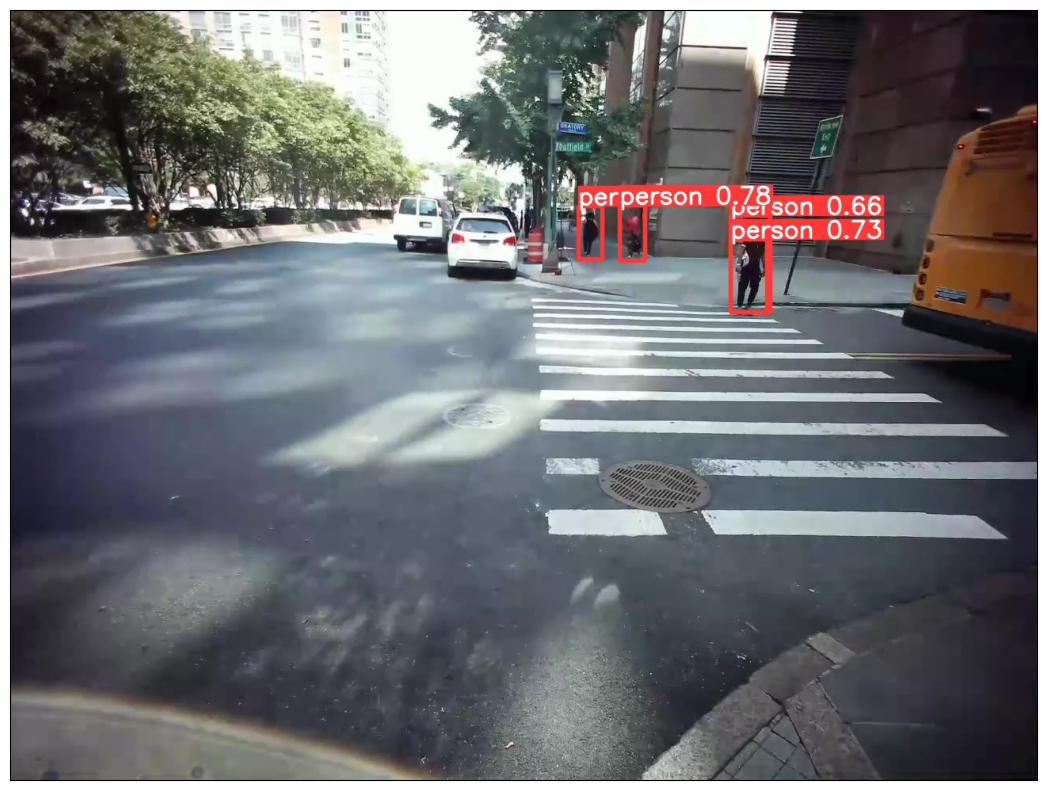

In [16]:
plt.figure(figsize=(16,10))
img = PILImage.open(f"{HOME}/runs/detect/predict/right_half - Trim - frame at 0m0s.jpg")
plt.imshow(img)
plt.grid(None)
plt.xticks([])
plt.yticks([])

### Check Detector Output on Video

In [18]:
# == Convert mp4 to webm video file for proper display on colab == /content/ByteTrack/runs/detect/
!ffmpeg -i runs/detect/predict2/right_half - Trim - Trim.avi -vcodec vp9 detect_vid.webm

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
# == Display results ==
from IPython.display import HTML
from base64 import b64encode

video_path = './detect_vid.webm'

mp4 = open(video_path, "rb").read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/webm">
</video>
""")

## Tracking with BYTETrack

### Utility Functions

In [ ]:
with open(f"{HOME}/datasets/basketball.yaml", "r") as f:
    settings = yaml.safe_load(f)

ID2CLASSES = settings["names"]
CLASSES = ID2CLASSES.values()
TEXT_COLOR = (0, 0, 255)
COLORS = [(0, 255, 0),
          (255, 0, 0),
          (255, 255, 0),
          (0, 255, 255)]

text_scale = 1.5
text_thickness = 2
line_thickness = 2

In [ ]:
def calculate_centroid(tl_x, tl_y, w, h):
    mid_x = int(tl_x + w/2)
    mid_y = int(tl_y + h/2)
    return mid_x, mid_y

def convert_output(outputs: torch.Tensor):
    # Output of format []
    return

def convert_history_to_dict(track_history):
    history_dict = {}
    for frame_content in track_history:
        obj_ids, tlwhs, _ = frame_content
        for obj_id, tlwh in zip(obj_ids, tlwhs):
            tl_x, tl_y, w, h = tlwh
            mid_x, mid_y = calculate_centroid(tl_x, tl_y, w, h)

            if obj_id not in history_dict.keys():
                history_dict[obj_id] = [[mid_x, mid_y]]
            else:
                history_dict[obj_id].append([mid_x, mid_y])

    return history_dict

def plot_tracking(image, track_history):
    obj_ids, tlwhs, class_ids = track_history[-1]
    history_dict = convert_history_to_dict(track_history)

    im = np.ascontiguousarray(np.copy(image))
    im_h, im_w = im.shape[:2]

    top_view = np.zeros([im_w, im_w, 3], dtype=np.uint8) + 255

    num_detections = len(tlwhs)
    label_count = {class_name: 0 for class_name in CLASSES}
    for label_idx in class_ids:
        label_count[ID2CLASSES[label_idx]] += 1

    for i, tlwh in enumerate(tlwhs):
        x1, y1, w, h = tlwh
        intbox = tuple(map(int, (x1, y1, x1 + w, y1 + h)))
        obj_id = int(obj_ids[i])
        class_id = class_ids[i]
        id_text = '{}'.format(int(obj_id))
        color = COLORS[class_id]
        cv2.rectangle(im, intbox[0:2], intbox[2:4], color=color, thickness=line_thickness)
        cv2.putText(im, id_text, (intbox[0], intbox[1]), cv2.FONT_HERSHEY_PLAIN, text_scale, color,
                    thickness=text_thickness)
        cv2.putText(im, ID2CLASSES[class_id], (intbox[0], intbox[3] + 20) , cv2.FONT_HERSHEY_PLAIN, text_scale, color, thickness = text_thickness)

        for idx in range(len(history_dict[obj_id]) - 1):
            prev_point, next_point = history_dict[obj_id][idx], history_dict[obj_id][idx+ 1]
            cv2.line(im, prev_point, next_point, color, 2)

    return im

### Hyperparameter Settings

In [ ]:
class ByteTrackArgument:
    track_thresh = 0.5
    track_buffer = 50
    match_thresh = 0.8
    aspect_ratio_thresh = 10.0
    min_box_area = 1.0
    mot20 = False

MIN_THRESHOLD = 0.001
INPUT_VIDEO_PATH = f"{HOME}/datasets/game3_short.mp4"
save_result = True
plot_basketball = False

### Tracking Loop

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker

In [ ]:
save_folder = f"{HOME}/output_videos"
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, INPUT_VIDEO_PATH.split("/")[-1][:-4] + ".avi")
training_run = "train"

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_ckpt = f"{HOME}/runs/detect/{training_run}/weights/best.pt"
print(f"Load model at {model_ckpt}")
model = YOLO(model_ckpt)

cap = cv2.VideoCapture(INPUT_VIDEO_PATH)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"video save_path is {save_path}")

# vid_writer = cv2.VideoWriter(
#     save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (int(width), int(height))
# )

vid_writer = cv2.VideoWriter(
    save_path, cv2.VideoWriter_fourcc(*'DIVX'), fps, (int(width), int(height))
)

trackers = [BYTETracker(ByteTrackArgument), BYTETracker(ByteTrackArgument), BYTETracker(ByteTrackArgument)]
frame_id = 0
results = []
history = deque()

while True:
    if frame_id % 20 == 0:
        print(f'Processing frame {frame_id}.')
    ret_val, online_im = cap.read()
    if ret_val:
        outputs = model.predict(source=online_im, conf=MIN_THRESHOLD)
        img_height, img_width = outputs[0].boxes.orig_shape
        outputs = outputs[0].boxes.boxes
        all_tlwhs = []
        all_ids = []
        all_classes = []
        for i, tracker in enumerate(trackers):
            class_outputs = outputs[outputs[:, 5] == i][:,:5]
            if class_outputs is not None:
                online_targets = tracker.update(class_outputs.cpu(), [img_height, img_width], [img_height.item(), img_width.item()])
                online_tlwhs = []
                online_ids = []
                online_scores = []
                online_classes = [i] * len(online_targets)
                for t in online_targets:
                    tlwh = t.tlwh
                    tid = t.track_id
                    vertical = tlwh[2] / tlwh[3] > ByteTrackArgument.aspect_ratio_thresh
                    if tlwh[2] * tlwh[3] > ByteTrackArgument.min_box_area and not vertical:
                        online_tlwhs.append(tlwh)
                        online_ids.append(tid)
                        online_scores.append(t.score)
                        box = (tlwh[0], tlwh[1], tlwh[2], tlwh[3])
                        results.append(
                            # frame_id, track_id, tl_x, tl_y, w, h, score = obj_prob * class_prob, class_idx, dummy, dummy, dummy
                            f"{frame_id},{tid},{tlwh[0]:.2f},{tlwh[1]:.2f},{tlwh[2]:.2f},{tlwh[3]:.2f},{t.score:.2f},-1,-1,-1\n"
                            )

                all_tlwhs += online_tlwhs
                all_ids += online_ids
                all_classes += online_classes

        if plot_basketball:
            basketball_outputs = outputs[outputs[:, 5] == 3].cpu().numpy()
            if basketball_outputs is not None:
                max_idx = np.argmax(basketball_outputs[:, 4])
                basketball_bbox = basketball_outputs[max_idx, :][:4]
                conf = basketball_outputs[max_idx, :][4]
                if conf > 0.5:
                    x1, y1, w, h = basketball_bbox
                    intbox = tuple(map(int, (x1, y1, x1 + w, y1 + h)))
                    class_id = 3
                    color = COLORS[class_id]
                    cv2.rectangle(online_im, intbox[0:2], intbox[2:4], color=color, thickness=line_thickness)
                    cv2.putText(online_im, ID2CLASSES[class_id], (intbox[0], intbox[3] + 20) , cv2.FONT_HERSHEY_PLAIN, text_scale, color, thickness = text_thickness)

            else:
                continue

        if len(history) < 30:
            history.append((all_ids, all_tlwhs, all_classes))
        else:
            history.popleft()
            history.append((all_ids, all_tlwhs, all_classes))

        if len(all_tlwhs) > 0:
            online_im = plot_tracking(
                online_im, history
            )

        else:
            online_im = online_im

        # # For Debug
        # plt.figure(figsize = (16,10))
        # plt.imshow(online_im)
        # break

        if save_result:
            online_im = cv2.resize(online_im, (int(width), int(height)))
            vid_writer.write(online_im)
        ch = cv2.waitKey(1)
        if ch == 27 or ch == ord("q") or ch == ord("Q"):
            break
    else:
        break

    frame_id += 1


## Copy Output Video to Drive

In [ ]:
# Copy output file into Drive

%cd /content

from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!cp -r /content/ByteTrack/output_videos/game3_short.avi "/content/drive/MyDrive/Datature"

In [ ]:
%cd {HOME}
# == Convert mp4 to webm video file for proper display on colab ==
!ffmpeg -i ./output_videos/game3_short.avi -vcodec vp9 output_videos/game3_short.webm

In [ ]:
%cd {HOME}

# == Display results ==
from IPython.display import HTML
from base64 import b64encode

video_path = './output_videos/game3_short.webm'

mp4 = open(video_path, "rb").read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=600 controls>
      <source src="{data_url}" type="video/webm">
</video>
""")